## IMPORT FILES

In [2]:
### Step 1: Load
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import re

## DATASET LOAD

In [4]:
# Replace 'your_dataset.xlsx' with the actual file name
file_path = 'cleaned_data.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows to verify the data
df.head()



Comments Like Prediction
0  অনেকের কমেন্ট পড়ে বুঝলাম এইটা একটা ঔষধি গুণসম্...   22   Negative
1  রাত বাজে ১২ তা ঘুম আস্তেছিল না ,শুধু ১ বার গান...    9   Negative
2  আলহামদুলিল্লাহ পুরো গানটা শুনে কঠিন ধৈর্য্যের ...   74   Negative
3  জ্বর হইছিলো, গান শুনে জ্বর চলে গেছে । শুধু এখন...  155   Negative
4  কি কণ্ঠ! শুনে শিহরিত হয়ে গেলাম!! আলহামদুলিল্ল...   65   Negative

## Preprocessing

In [6]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations
                               
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)
    
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

## Stemming

In [8]:
# Import necessary libraries
import logging
from bangla_stemmer.stemmer import stemmer

# Suppress logs from the Bangla Stemmer library
logging.getLogger('bangla_stemmer').setLevel(logging.CRITICAL)

# Define the stemming function
def stem_text(text):
    stmr = stemmer.BanglaStemmer()  # Initialize the stemmer
    words = str(text).split()  # Split the text into words
    stemmed_words = stmr.stem(words)  # Perform stemming
    return ' '.join(stemmed_words)  # Join the stemmed words back into a single string

# Apply stemming to the 'Comments' column
df['stemmedComments'] = df['Comments'].apply(stem_text)

# Display the first few rows to verify the result
df.head()

applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
appl

Comments Like Prediction  \
0  অনেকের কমেন্ট পড়ে বুঝলাম এইটা একটা ঔষধি গুণসম্...   22   Negative   
1  রাত বাজে ১২ তা ঘুম আস্তেছিল না ,শুধু ১ বার গান...    9   Negative   
2  আলহামদুলিল্লাহ পুরো গানটা শুনে কঠিন ধৈর্য্যের ...   74   Negative   
3  জ্বর হইছিলো, গান শুনে জ্বর চলে গেছে । শুধু এখন...  155   Negative   
4  কি কণ্ঠ! শুনে শিহরিত হয়ে গেলাম!! আলহামদুলিল্ল...   65   Negative   

                                     stemmedComments  
0  অনেকের কমেন্ট পড়ে বুঝ এই এক ঔষধি গুণসম্পন্ন গা...  
1  রাত বাজে ১২ তা ঘুম আস্তেছিল না ,শুধু ১ বার গান...  
2  আলহামদুলিল্লাহ পুরো গান শুনে কঠিন ধৈর্য্য পরীক...  
3  জ্বর হইছিলো, গান শুনে জ্বর চলে গেছ । শুধু এখন ...  
4  কি কণ্ঠ! শুনে শিহরিত হয়ে গেলাম!! আলহামদুলিল্ল...

## Changing Labels to Numbers

In [10]:
# Find unique labels in the 'Prediction' column
unique_labels = df['Prediction'].unique()
print("Unique labels in 'Prediction' column:")
print(unique_labels)

Unique labels in 'Prediction' column:
['Negative' 'Positive']


In [11]:
# Create a mapping of labels to numbers
label_to_number = {label: idx for idx, label in enumerate(unique_labels)}

# Print the mapping
print("\nMapping of labels to numbers:")
print(label_to_number)

# Replace labels in the 'Prediction' column with corresponding numbers
df['PredictionNumeric'] = df['Prediction'].map(label_to_number)


Mapping of labels to numbers:
{'Negative': 0, 'Positive': 1}


In [12]:
# Display the first few rows to verify
print("\nDataFrame with numeric labels:")
df.head()


DataFrame with numeric labels:


Comments Like Prediction  \
0  অনেকের কমেন্ট পড়ে বুঝলাম এইটা একটা ঔষধি গুণসম্...   22   Negative   
1  রাত বাজে ১২ তা ঘুম আস্তেছিল না ,শুধু ১ বার গান...    9   Negative   
2  আলহামদুলিল্লাহ পুরো গানটা শুনে কঠিন ধৈর্য্যের ...   74   Negative   
3  জ্বর হইছিলো, গান শুনে জ্বর চলে গেছে । শুধু এখন...  155   Negative   
4  কি কণ্ঠ! শুনে শিহরিত হয়ে গেলাম!! আলহামদুলিল্ল...   65   Negative   

                                     stemmedComments  PredictionNumeric  
0  অনেকের কমেন্ট পড়ে বুঝ এই এক ঔষধি গুণসম্পন্ন গা...                  0  
1  রাত বাজে ১২ তা ঘুম আস্তেছিল না ,শুধু ১ বার গান...                  0  
2  আলহামদুলিল্লাহ পুরো গান শুনে কঠিন ধৈর্য্য পরীক...                  0  
3  জ্বর হইছিলো, গান শুনে জ্বর চলে গেছ । শুধু এখন ...                  0  
4  কি কণ্ঠ! শুনে শিহরিত হয়ে গেলাম!! আলহামদুলিল্ল...                  0

## Removing Null values

In [14]:
# Display the count of non-null values before dropping nulls
print("Non-null values before dropping:")
print(df.info())

# Drop rows with null values in the 'Comments' or 'Prediction' columns
df = df.dropna(subset=['stemmedComments', 'PredictionNumeric'])

# Display the count of non-null values after dropping nulls
print("\nNon-null values after dropping:")
print(df.info())

# Display the first few rows to verify
df.head()


Non-null values before dropping:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25037 entries, 0 to 25036
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Comments           25037 non-null  object
 1   Like               24958 non-null  object
 2   Prediction         25037 non-null  object
 3   stemmedComments    25037 non-null  object
 4   PredictionNumeric  25037 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 978.1+ KB
None

Non-null values after dropping:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25037 entries, 0 to 25036
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Comments           25037 non-null  object
 1   Like               24958 non-null  object
 2   Prediction         25037 non-null  object
 3   stemmedComments    25037 non-null  object
 4   PredictionNumeric  25037 non-null  int64 
dty

Comments Like Prediction  \
0  অনেকের কমেন্ট পড়ে বুঝলাম এইটা একটা ঔষধি গুণসম্...   22   Negative   
1  রাত বাজে ১২ তা ঘুম আস্তেছিল না ,শুধু ১ বার গান...    9   Negative   
2  আলহামদুলিল্লাহ পুরো গানটা শুনে কঠিন ধৈর্য্যের ...   74   Negative   
3  জ্বর হইছিলো, গান শুনে জ্বর চলে গেছে । শুধু এখন...  155   Negative   
4  কি কণ্ঠ! শুনে শিহরিত হয়ে গেলাম!! আলহামদুলিল্ল...   65   Negative   

                                     stemmedComments  PredictionNumeric  
0  অনেকের কমেন্ট পড়ে বুঝ এই এক ঔষধি গুণসম্পন্ন গা...                  0  
1  রাত বাজে ১২ তা ঘুম আস্তেছিল না ,শুধু ১ বার গান...                  0  
2  আলহামদুলিল্লাহ পুরো গান শুনে কঠিন ধৈর্য্য পরীক...                  0  
3  জ্বর হইছিলো, গান শুনে জ্বর চলে গেছ । শুধু এখন ...                  0  
4  কি কণ্ঠ! শুনে শিহরিত হয়ে গেলাম!! আলহামদুলিল্ল...                  0

In [15]:
# Split dataset into 80% training and 20% testing
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(f"Training data: {len(train_df)}, Testing data: {len(test_df)}")

Training data: 20029, Testing data: 5008


## Step 3: Prepare Data for RNN

In [17]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization & Padding
MAX_WORDS = 5000
MAX_LEN = 100

tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(train_df['stemmedComments'])

X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['stemmedComments']), maxlen=MAX_LEN)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df['stemmedComments']), maxlen=MAX_LEN)

# Encode Labels
le = LabelEncoder()
y_train = le.fit_transform(train_df['PredictionNumeric'])
y_test = le.transform(test_df['PredictionNumeric'])

# Convert to PyTorch Tensors and move to device
X_train, y_train = torch.tensor(X_train, dtype=torch.int64), torch.tensor(y_train, dtype=torch.int64)
X_test, y_test = torch.tensor(X_test, dtype=torch.int64), torch.tensor(y_test, dtype=torch.int64)

# Move data to device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

print("Data prepared for RNN.")


Data prepared for RNN.


## Step 4: Define RNN Model

In [19]:
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class RNNModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(RNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.rnn = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        x = self.embedding(x)
        _, (hidden, _) = self.rnn(x)
        return self.fc(hidden[-1])

model = RNNModel(vocab_size=MAX_WORDS, embed_dim=128, hidden_dim=64, output_dim=len(le.classes_)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Training On: ", device)


Training On:  cuda


## Step 5: Train RNN Model

In [21]:
EPOCHS = 100
BATCH_SIZE = 32
train_loader = DataLoader(list(zip(X_train, y_train)), batch_size=BATCH_SIZE, shuffle=True)

def train_model():
    model.train()
    for epoch in range(EPOCHS):
        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{EPOCHS}, Loss: {loss.item()}")

train_model()
print("Training complete.")



Epoch 0/100, Loss: 0.5159813165664673
Epoch 10/100, Loss: 0.33145207166671753
Epoch 20/100, Loss: 0.37377315759658813
Epoch 30/100, Loss: 0.3550657331943512
Epoch 40/100, Loss: 0.3718714118003845
Epoch 50/100, Loss: 0.4833109974861145
Epoch 60/100, Loss: 0.48477089405059814
Epoch 70/100, Loss: 0.3098117709159851
Epoch 80/100, Loss: 0.4208475351333618
Epoch 90/100, Loss: 0.2871094346046448
Training complete.


## Accuracy

In [23]:
from sklearn.metrics import accuracy_score
# Make sure to move the test data to the device
model.eval()
X_test = X_test.to(device)

# Get predictions
outputs = model(X_test)
preds = outputs.argmax(dim=1).cpu().numpy()
true_labels = y_test.cpu().numpy()

# Calculate accuracy
accuracy = accuracy_score(true_labels, preds)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.6645


## Confusion Matrix

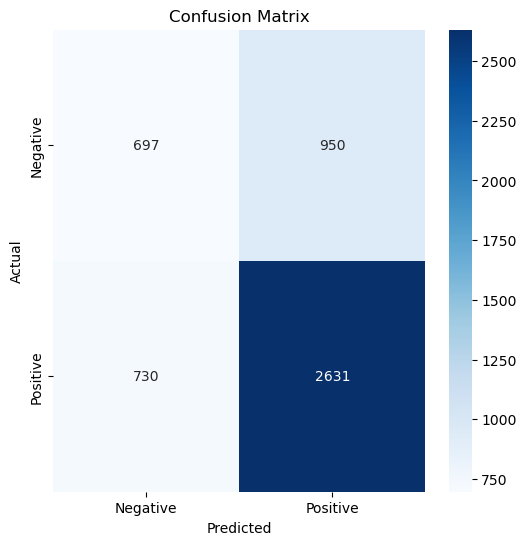

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns 

cm = confusion_matrix(true_labels, preds)
labels = ['Negative', 'Positive']  # Adjust based on actual labels
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Step 7: Classification Report

In [31]:
### Step 7: Classification Report
from sklearn.metrics import classification_report
print(classification_report(true_labels, preds))

              precision    recall  f1-score   support

           0       0.49      0.42      0.45      1647
           1       0.73      0.78      0.76      3361

    accuracy                           0.66      5008
   macro avg       0.61      0.60      0.61      5008
weighted avg       0.65      0.66      0.66      5008



## Step 8: ROC Curve

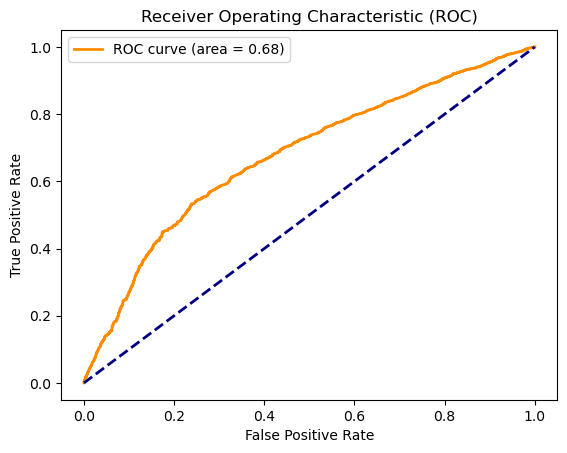

In [36]:
from sklearn.metrics import roc_curve, auc

# Get probabilities for the positive class
probs = torch.softmax(outputs, dim=1)[:, 1].detach().cpu().numpy()  # Detach and get probabilities for class 1

fpr, tpr, _ = roc_curve(true_labels, probs, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()


## Step 9: Precision-Recall Curve

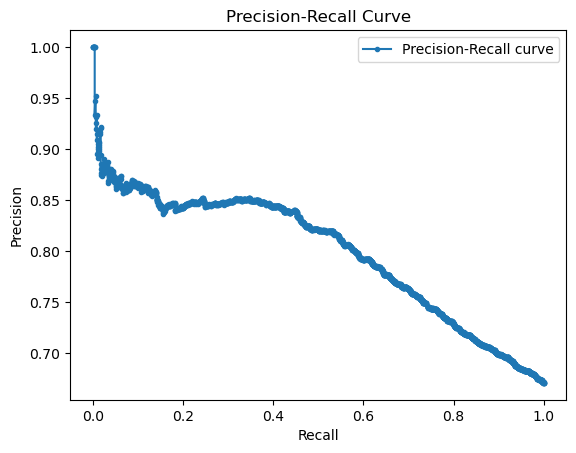

In [39]:
### Step 9: Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(true_labels, probs)
plt.figure()
plt.plot(recall, precision, marker='.', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
